In [1]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())
                   

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
#Check missing value
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

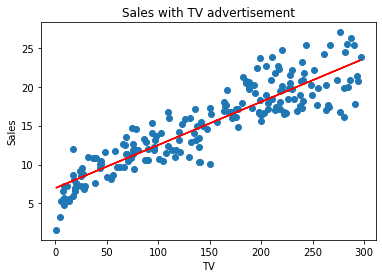

In [14]:
#Visualization
import matplotlib.pyplot as plt
import numpy as np

#Scatter plot of Sales and TV
plt.scatter(data["TV"], data["Sales"])

#Fit a linear regression line
slope, intercept = np.polyfit(data["TV"], data["Sales"], 1)
plt.plot(data["TV"], slope * data["TV"] + intercept, color='red', label='Trendline')
plt.title("Sales with TV advertisement")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [27]:
#Alternative Visualization
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x= "TV", y= "Sales", size="TV", trendline ="ols",title="Sales with TV Advertisement")
figure.show()

In [26]:
figure = px.scatter(data_frame = data, x= "Newspaper", y= "Sales", size="Newspaper", trendline ="ols", title ="Sales with Newspaper Advertisement")
figure.show()

In [25]:
figure= px.scatter(data_frame= data, x="Radio", y="Sales",size="Radio", trendline="ols", title="Sales with Radio Advertisement")
figure.show()

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64



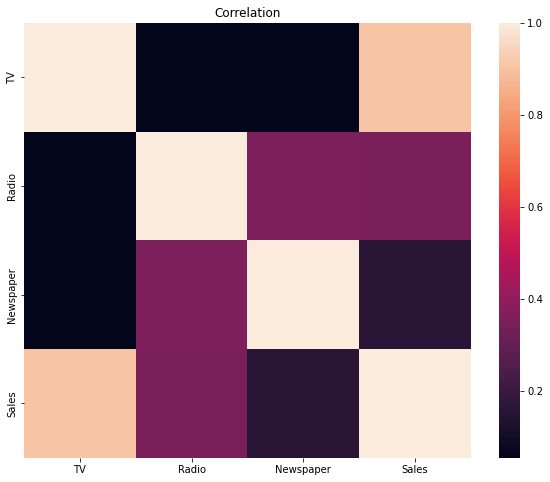

In [31]:
#Correlation
correlation= data.corr()
print(correlation["Sales"].sort_values(ascending=False))
print()

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(correlation)
plt.title("Correlation")
plt.show()

In [45]:
#Modelling
x= np.array(data.drop(["Sales"],1))
y= np.array(data["Sales"])
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest))

0.9059011844150826


In [36]:
#features = [[TV,Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]
